In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_dataset_with_label_fill_user_mean.csv')
df = pd.DataFrame(df)

In [ ]:
cols_group1 = list(range(1, 27)) + [-1]
df_activity = df.iloc[:, cols_group1]

# 1, 2번째 열과 26번째부터 마지막 열을 포함한 그룹 묶기
cols_group2 = [1, 2] + list(range(26, df.shape[1]))
df_sleep = df.iloc[:, cols_group2]

df_sleep.to_csv('sleep.csv', index=False)
df_activity.to_csv('activity.csv', index = False)

In [ ]:
sleep = pd.DataFrame(df_sleep)
activity = pd.DataFrame(df_activity)

In [ ]:
df_sleep_CN = sleep.loc[sleep['DIAG_NM'] == 'CN']
# DEM에 해당하는 데이터 추출
df_sleep_DEM = sleep.loc[sleep['DIAG_NM'] == 'DEM']
# MCI에 해당하는 데이터 추출
df_sleep_MCI = sleep.loc[sleep['DIAG_NM'] == 'MCI']

In [ ]:
x = sleep[['sleep_breath_average','sleep_hr_average', 'sleep_rem', 'sleep_hr_average','sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']]
y_CN = df_sleep_CN.loc[df_sleep_CN['DIAG_NM'] == 'CN'].iloc[:, -1]
y_DEM = df_sleep_DEM.loc[df_sleep_DEM['DIAG_NM'] == 'DEM'].iloc[:, -1]
y_MCI = df_sleep_MCI.loc[df_sleep_MCI['DIAG_NM'] == 'MCI'].iloc[:, -1]


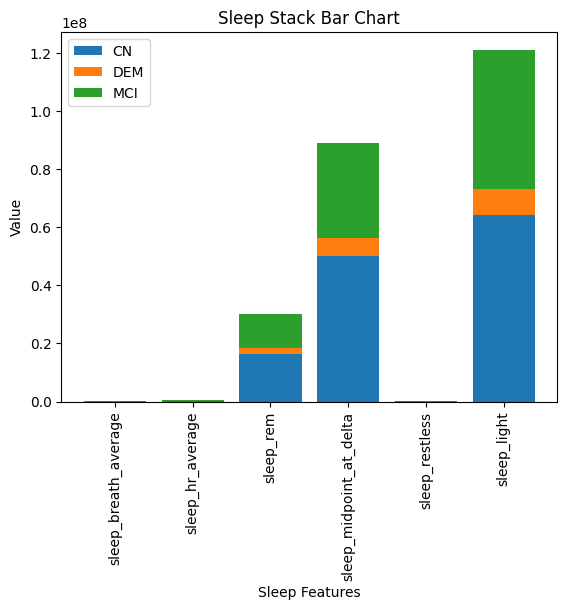

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# sleep 데이터 프레임 불러오기
df_sleep = pd.read_csv('sleep.csv')

# DIAG_NM 기준으로 그룹화하여 CN, DEM, MCI에 해당하는 데이터프레임 추출
df_grouped = df_sleep.groupby('DIAG_NM')
df_CN = df_grouped.get_group('CN')[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']].sum()
df_DEM = df_grouped.get_group('Dem')[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']].sum()
df_MCI = df_grouped.get_group('MCI')[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']].sum()

# 스택 바 차트 그리기
x = df_CN.index
y_CN = df_CN.values
y_DEM = df_DEM.values
y_MCI = df_MCI.values

plt.bar(x, y_CN, label='CN')
plt.bar(x, y_DEM, bottom=y_CN, label='DEM')
plt.bar(x, y_MCI, bottom=y_CN+y_DEM, label='MCI')



plt.xticks(rotation=90)
plt.xlabel('Sleep Features')
plt.ylabel('Value')
plt.title('Sleep Stack Bar Chart')
plt.legend()

plt.show()


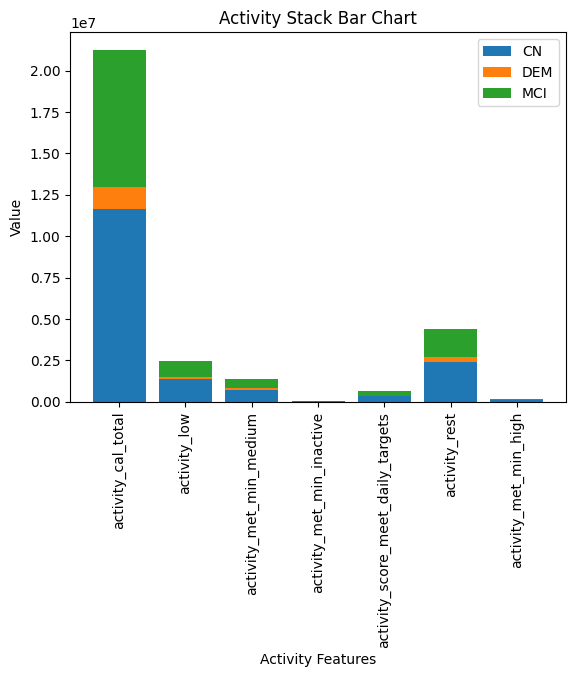

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# activity 데이터 프레임 불러오기
df_activity = pd.read_csv('activity.csv')

# DIAG_NM 기준으로 그룹화하여 CN, DEM, MCI에 해당하는 데이터프레임 추출
df_grouped = df_activity.groupby('DIAG_NM')
df_CN = df_grouped.get_group('CN')[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']].sum()
df_DEM = df_grouped.get_group('Dem')[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']].sum()
df_MCI = df_grouped.get_group('MCI')[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']].sum()

# 스택 바 차트 그리기
x = df_CN.index
y_CN = df_CN.values
y_DEM = df_DEM.values
y_MCI = df_MCI.values

plt.bar(x, y_CN, label='CN')
plt.bar(x, y_DEM, bottom=y_CN, label='DEM')
plt.bar(x, y_MCI, bottom=y_CN+y_DEM, label='MCI')



plt.xticks(rotation=90)
plt.xlabel('Activity Features')
plt.ylabel('Value')
plt.title('Activity Stack Bar Chart')
plt.legend()

plt.show()

In [ ]:
mean = pd.read_csv('train_dataset_with_label_find_mean_with_nan.csv')

In [ ]:
mean_df = pd.DataFrame(mean)

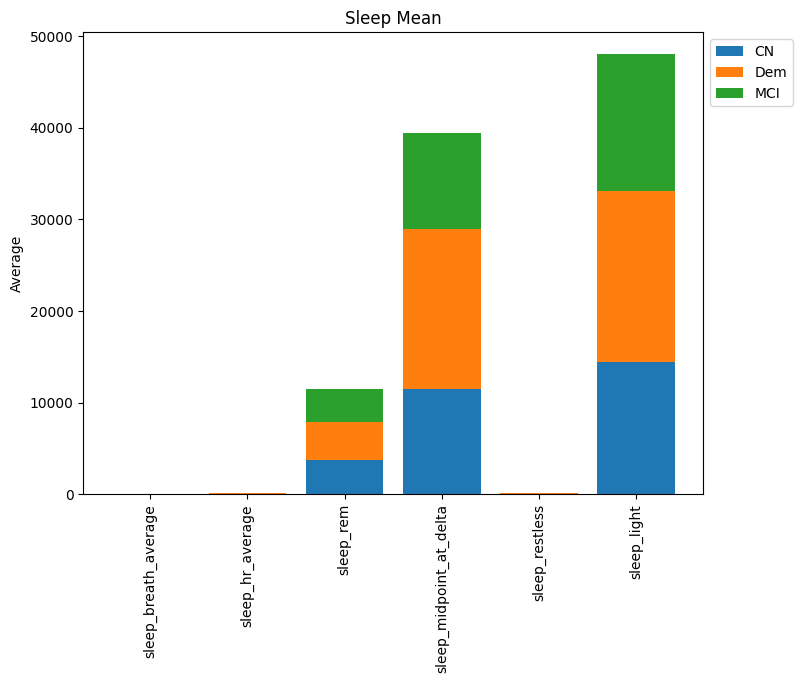

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
features = mean_df[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']]
x_pos = range(len(features.columns))
for i, diag in enumerate(mean_df['DIAG_NM']):
    ax.bar(x_pos, mean_df[features.columns].loc[i], bottom=mean_df[features.columns].loc[:i-1].sum(), label=diag)
ax.set_xticks(x_pos)
ax.set_xticklabels(features.columns, rotation=90)
ax.set_ylabel('Average')
ax.set_title('Sleep Mean')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

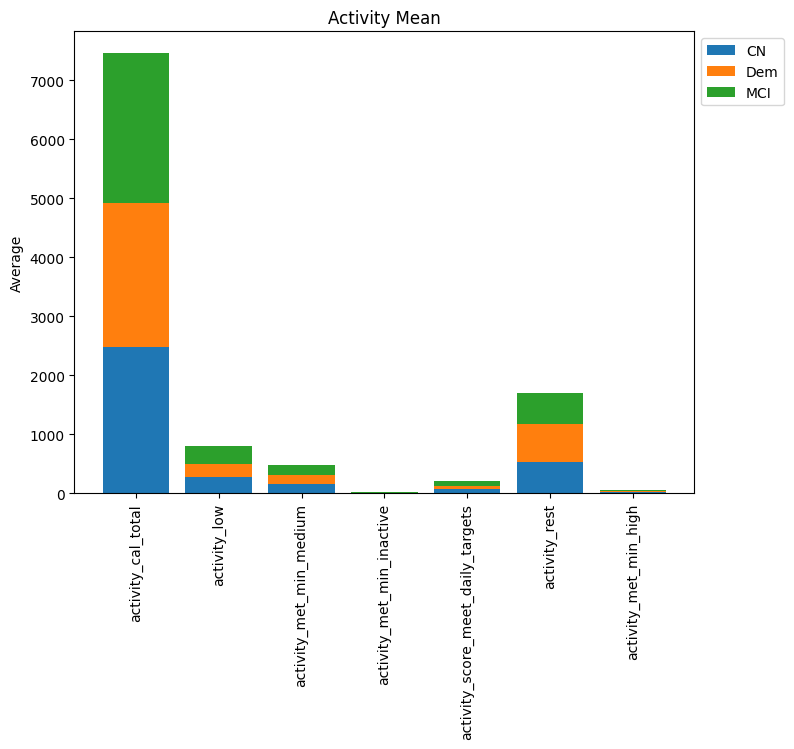

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
features = mean_df[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']]
x_pos = range(len(features.columns))
for i, diag in enumerate(mean_df['DIAG_NM']):
    ax.bar(x_pos, mean_df[features.columns].loc[i], bottom=mean_df[features.columns].loc[:i-1].sum(), label=diag)
ax.set_xticks(x_pos)
ax.set_xticklabels(features.columns, rotation=90)
ax.set_ylabel('Average')
ax.set_title('Activity Mean')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

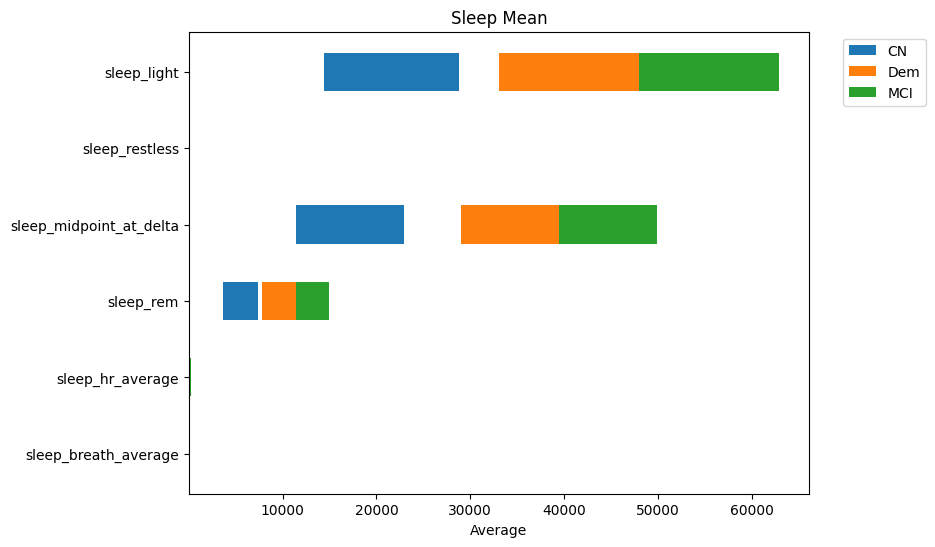

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
features = mean_df[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']]
y_pos = range(len(features.columns))
for i, diag in enumerate(mean_df['DIAG_NM']):
    ax.barh(y_pos, mean_df[features.columns].loc[i], left=mean_df[features.columns].loc[:i].sum(), height=0.5, label=diag)
ax.set_yticks(y_pos)
ax.set_yticklabels(features.columns)
ax.set_xlabel('Average')
ax.set_title('Sleep Mean')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


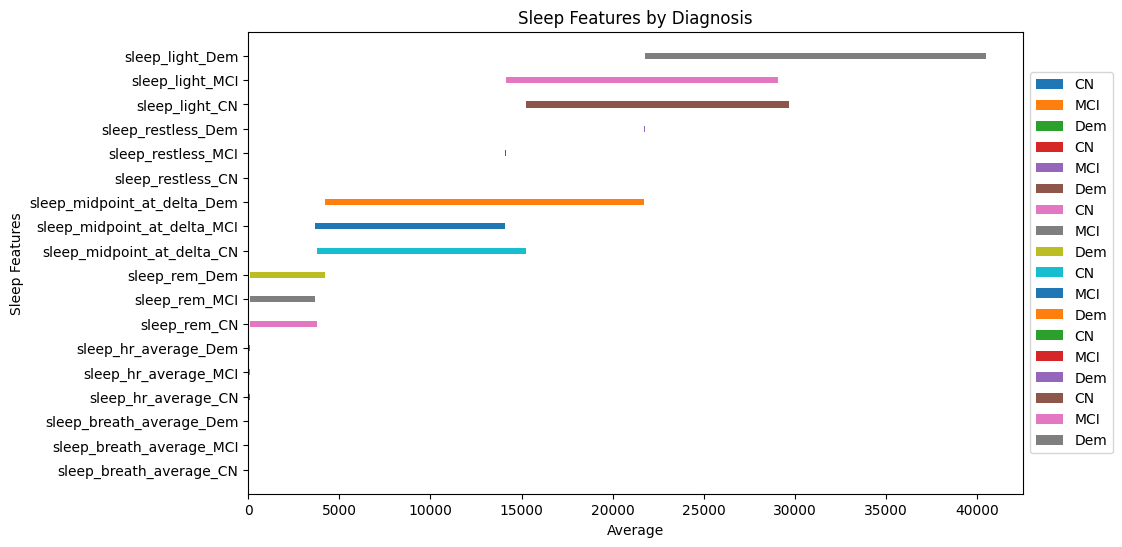

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
features = ['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']
diagnoses = ['CN', 'MCI', 'Dem']
width = 0.25

for i, feature in enumerate(features):
    for j, diagnosis in enumerate(diagnoses):
        values = mean_df.loc[mean_df['DIAG_NM'] == diagnosis, feature]
        ax.barh(feature + "_" + diagnosis, values, height=width, label=diagnosis, left=mean_df.loc[mean_df['DIAG_NM'] == diagnosis, features[:i]].sum(axis=1))
    
ax.set_xlabel('Average')
ax.set_ylabel('Sleep Features')
ax.set_title('Sleep Features by Diagnosis')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()